<h1>Skalierung von Daten</h1>

Oft ist es notwendig, die Daten die man hat zu skalieren, bevor man diese für das Training nutzt.

Damit erzielt man bessere mit Ergebnisse und Visualisierungen werden eindeutiger. 

In [89]:
# Imports.
import pandas as pd
import numpy  as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

Der MinMaxScaler skaliert gegebene Daten in den Bereich 0 bis 1. <br>
Die Transformation läuft so ab:

`X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))`<br>
`X_scaled = X_std * (max - min) + min`

<h2>Min-Max</h2>

In [90]:
# Beispiel 1 # 
data_1 = [np.random.randint(0, 5000) for x in range(200)]
print(data_1[:3])

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(np.array(data_1).reshape(-1, 1))
scaled_data = minmax_scaler.transform(np.array(data_1).reshape(-1, 1))

print(scaled_data[:3].reshape(1, -1))

[635, 2889, 1500]
[[0.12675491 0.5788207  0.30024067]]


In [91]:
# Beispiel 2 # 
data_1 = [np.random.randint(0, 10) for x in range(10)]
print(data_1)

minmax_scaler = MinMaxScaler()
scaled_data  = minmax_scaler.fit_transform(np.array(data_1).reshape(-1, 1))

print(scaled_data.reshape(1, -1))

[6, 8, 8, 7, 5, 6, 8, 5, 6, 0]
[[0.75  1.    1.    0.875 0.625 0.75  1.    0.625 0.75  0.   ]]


In [92]:
# Beispiel 3 # 
# - Nutze Bereich 0 bis 2
data_1 = [np.random.randint(0, 10) for x in range(10)]
print(data_1)

minmax_scaler = MinMaxScaler( feature_range=(0, 2) )
scaled_data  = minmax_scaler.fit_transform(np.array(data_1).reshape(-1, 1))

print(scaled_data.reshape(1, -1))

[2, 7, 9, 4, 5, 6, 2, 8, 8, 5]
[[0.         1.42857143 2.         0.57142857 0.85714286 1.14285714
  0.         1.71428571 1.71428571 0.85714286]]


Üblicherweise wird der Bereich 0 bis 1 genutzt, ein anderer Bereich kann auch genutzt werden.

Ein simples Beispiel zeigt wie eine Skalierung der Daten die Visualisierung verbessern kann.

In [93]:
income_df = pd.read_csv('./files_data/data/income.csv')
income_df.head(2)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000


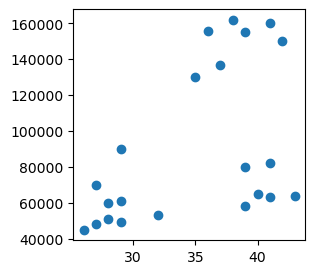

In [94]:
plt.figure(figsize=(3,3))
plt.scatter(income_df['Age'], income_df['Income($)'])  

Das Ziel ist es mit Kmeans eine Gruppierung zu finden. 

In [95]:
model = KMeans(n_clusters=3)  # K = 3
pred  = model.fit_predict(income_df[['Age', 'Income($)']])
pred

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [96]:
income_df['class'] = pred

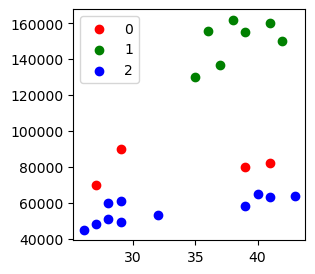

In [97]:
plt.figure(figsize=(3,3))
colores = ['red', 'green', 'blue']
for i in range(len(income_df['class'].unique())):
    plt.scatter(income_df.loc[income_df['class']==i ,['Age']], income_df.loc[income_df['class']==i,['Income($)']], label=i, color=colores[i])  
    
plt.legend()

Das Model hat versucht die Punkte zu gruppieren. Der Plot zeigt aber, dass die blauen Punkte doch recht weit auseinander liegen. <br>
Das liegt daran, dass die Daten nicht skaliert sind.

In [116]:
# Skaliere Daten.
minmax_scaler = MinMaxScaler()

scaled_data = income_df[['Age', 'Income($)']].copy()
scaled_data[['Age', 'Income($)']] = minmax_scaler.fit_transform(scaled_data )
scaled_data.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


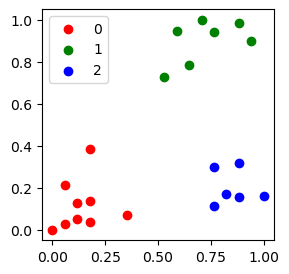

In [124]:
model = KMeans(n_clusters=3)  # K = 3
pred  = model.fit_predict(scaled_data[['Age', 'Income($)' ]])
scaled_data['class'] = pred

plt.figure(figsize=(3,3))
colores = ['red', 'green', 'blue']
for i in range(len(scaled_data['class'].unique())):
    plt.scatter(scaled_data.loc[scaled_data['class']==i ,['Age']], scaled_data.loc[scaled_data['class']==i,['Income($)']], \
                label=i, color=colores[i])  
    
plt.legend()

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


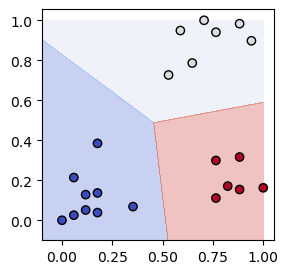

In [131]:
xx, yy = np.meshgrid(np.arange(-0.1, 1, 0.001), np.arange(-0.1, 1, 0.001))
# Model.

# Predictions.
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Plot.
plt.figure(figsize=(3,3))
plt.contourf(xx, yy, pred, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(scaled_data['Age'], scaled_data['Income($)'], c=scaled_data['class'], edgecolors='k', cmap=plt.cm.coolwarm)    

<h2>Standard-Scaler</h2>

Es gibt noch viele weitere Skalierungsmöglichkeiten, der Standard-Scaler ist einer, der auch gerne angewendet wird.

Hier wird die Standardabweichung zunutze gemacht.

$
z = \frac{x-u}{s}
$

u: mean <br>
s: Standardabweichung

In [143]:
# Beispiel 1 # 
data_1 = [np.random.randint(0, 30) for x in range(10)]
print(data_1[:3])

std_scaler  = StandardScaler()
scaled_data = std_scaler.fit_transform(np.array(data_1).reshape(-1,1))

print(scaled_data[:3].reshape(1, -1))

[26, 20, 26]
[[1.00266339 0.39498861 1.00266339]]


In [144]:
# Formel in Python.
def std_scaler(arr, x):
    return (x-np.mean(arr)) / np.std(arr)

In [145]:
std_scaler(data_1, 26)

1.0026633933668814

<h2>Einsatzgebiet dieser zwei Skalierungsmöglichkeiten</h2>

Es gibt nicht ohne Grund verschiedene Möglichkeiten. Kurz zusammengefasst.: <br>
- MinMax-Scaler bei Daten, die keiner Normalverteilung folgen.
- Standard-Scaler bei Daten, die einer Normalverteilung folgen, wie z. B. die Körpergröße von Menschen.